In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Read data

In [8]:
validated = pd.read_csv('csv/validated_alerts_rad_2022_result_v4.csv', delimiter=';')
validated

/tmp/ipykernel_1163/2535343436.py:1: DtypeWarning: Columns (11,14,17,20,23,29,35,38,41,46,49,81) have mixed types. Specify dtype option on import or set low_memory=False.
  validated = pd.read_csv('csv/validated_alerts_rad_2022_result_v4.csv', delimiter=';')


,id,idalerta,codealerta,fonte,areaha,anodetec,datadetec,dtimgant,dtimgdep,vpressao,...,eco_autorizacao_asv_name,eco_autorizacao_asv_area,eco_auto_infracao_count,eco_auto_infracao_names,ppa_overlap,ppa_count,ppa_area,legal_reserve_overlap,legal_reserve_count,legal_reserve_area
0,8862,1,1,"{DETERB-AMAZONIA,SAD}",593.05,2019,2019-01-01,2018-10-24,2019-05-27,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,True,1.0,5.672767
1,8863,9,9,"{GLAD,SAD}",13.81,2019,2019-01-01,2018-10-01,2019-04-11,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,True,3.0,13.428516
2,113878,10,10,{SAD},11.71,2019,2019-01-01,2018-07-03,2019-06-30,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,True,2.0,0.364556
3,61094,11,11,"{DETERB-AMAZONIA,SAD}",3.63,2019,2019-01-01,2018-07-04,2019-08-12,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN
4,8864,14,14,{SAD},8.84,2019,2019-01-01,2018-11-04,2019-04-10,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,True,2.0,7.892503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213505,210095,575667,574179,{SIRADX},9.95,2022,2022-03-01,2021-10-13,2022-01-24,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,True,1.0,2.954263
213506,210096,575673,574185,{SIRADX},3.20,2022,2022-03-01,2021-04-11,2022-01-11,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN
213507,210516,575674,574186,{SIRADX},0.36,2022,2022-03-01,2021-10-20,2022-05-12,agriculture,...,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN
213508,210086,575675,574187,{SIRADX},1.62,2022,2022-03-01,2021-08-05,2022-05-14,ilegal_mining,...,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN


In [9]:
validated.columns

Index(['id', 'idalerta', 'codealerta', 'fonte', 'areaha', 'anodetec',
       'datadetec', 'dtimgant', 'dtimgdep', 'vpressao', 'amacro_id',
       'amacro_name', 'amacro_area', 'altantic_forest_law_id',
       'atlantic_forest_law_name', 'atlantic_forest_law_area', 'biome_id',
       'biome_name', 'biome_area', 'conservation_units_id',
       'conservation_units_name', 'conservation_units_area', 'geoparks_id',
       'geoparks_name', 'geoparks_area', 'indigenous_territories_id',
       'indigenous_territories_name', 'indigenous_territories_area',
       'legal_amazon_id', 'legal_amazon_name', 'legal_amazon_area',
       'macro_watersheds_id', 'macro_watersheds_name', 'macro_watersheds_area',
       'matopiba_id', 'matopiba_name', 'matopiba_area', 'municipalities_id',
       'municipalities_name', 'municipalities_area', 'quilombos_id',
       'quilombos_name', 'quilombos_area', 'rural_properties_count',
       'rural_properties_area', 'rural_settlements_id',
       'rural_settlements_nam

### Filter year and sources

In [10]:
validated = validated[validated['anodetec'].isin([2019, 2020, 2021])]
validated = validated[~validated['fonte'].isin(['{IEF-MG}', '{INEMA-BA}'])]
validated['fonte'].value_counts()

{SAD}                                   97009
{SAD-CAATINGA}                          17366
{DETER-CERRADO}                         15661
{DETERB-AMAZONIA,SAD}                   15591
{DETERB-AMAZONIA}                       14382
{DETERB-AMAZONIA,GLAD,SAD}              10736
{GLAD}                                   8723
{GLAD,SAD}                               7916
{SIRADX}                                 6279
{PRODES-CERR}                            5497
{PRODES-AMZ}                             2227
{SAD-MATA-ATLANTICA}                     2173
{DETERB-AMAZONIA,GLAD}                   2053
{SIPAM-SAR}                               826
{SOS-INPE}                                732
{DETER-CERRADO,GLAD}                      540
{SAD-PANTANAL}                            170
{SAD,SIRADX}                              164
{SAD,SIPAM-SAR}                           144
{DETERB-AMAZONIA,SAD,SIPAM-SAR}           136
{DETERB-AMAZONIA,SAD,SIRADX}              103
{DETERB-AMAZONIA,GLAD,SAD,SIPAM-SA

### Pretify columns and values

In [11]:
validated['fonte']

0         {DETERB-AMAZONIA,SAD}
1                    {GLAD,SAD}
2                         {SAD}
3         {DETERB-AMAZONIA,SAD}
4                         {SAD}
                  ...          
210777           {SAD-CAATINGA}
210778           {SAD-CAATINGA}
210779           {SAD-CAATINGA}
210780           {SAD-CAATINGA}
210781           {SAD-CAATINGA}
Name: fonte, Length: 208814, dtype: object

In [12]:
# Columns
validated = validated.rename(columns={
    'biome_name': 'Biome',
    'fonte': 'Alert source',
    'anodetec': 'Detection year',
    'areaha': 'Area (ha)',
    'municipalities_name': 'Municipality',
    'states_name': 'County',
    'dtimgant': 'before_date',
    'dtimgdep': 'after_date'
})

# Values
validated['Biome'] = validated['Biome'].replace(to_replace={
    'AMAZÔNIA': 'Amazon',
    'CAATINGA': 'Caatinga',
    'CERRADO': 'Cerrado',
    'MATA ATLÂNTICA': 'Atlantic Forest',
    'PAMPA': 'Pampa',
    'PANTANAL': 'Pantanal',
})

## Biomes

### Number of alerts

In [13]:
df = validated.groupby(['Biome', 'Detection year']).size().reset_index(name='counts')
df_pivot = pd.pivot_table(df, values='counts', index=['Biome'], columns=['Detection year'], fill_value='0', margins=True, aggfunc= 'sum').astype(int)
df_pivot

Detection year,2019,2020,2021,All
Biome,,,,
Amazônia,47406,61322,46639,155367
Caatinga,536,5606,10620,16762
Cerrado,7394,10600,6914,24908
Mata Atlântica,1393,3069,5171,9633
Pampa,68,105,160,333
Pantanal,202,205,292,699
All,56999,80907,69796,207702


### Deforested area

In [14]:
df = validated.groupby(['Biome', 'Detection year'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome'], columns=['Detection year'], fill_value='0', margins=True, aggfunc= 'sum').astype(int)
df_pivot

Detection year,2019,2020,2021,All
Biome,,,,
Amazônia,772193,884089,977479,2633762
Caatinga,13563,67673,116398,197635
Cerrado,407443,447777,500328,1355548
Mata Atlântica,10492,23715,30160,64368
Pampa,642,1275,2420,4338
Pantanal,12551,25038,28994,66584
All,1216886,1449570,1655781,4322238


### Average size of deforestation

In [15]:
df = validated.groupby(['Biome', 'Detection year'])['Area (ha)'].mean().reset_index(name='Area (ha)')
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome'], fill_value='0', margins=True, aggfunc= 'mean').astype(int)
df_pivot

,Area (ha)
Biome,
Amazônia,17
Caatinga,16
Cerrado,56
Mata Atlântica,7
Pampa,12
Pantanal,94
All,33


### Largest size of deforestation

In [16]:
df = validated.groupby(['Biome'])['Area (ha)', 'Municipality', 'County', 'Detection year'].max().reset_index()
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Municipality', 'County', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()
df_pivot

/tmp/ipykernel_1163/982995483.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = validated.groupby(['Biome'])['Area (ha)', 'Municipality', 'County', 'Detection year'].max().reset_index()


,Biome,Municipality,County,Detection year,Area (ha)
0,Amazônia,Óbidos,TOCANTINS,2021,6469
1,Caatinga,Érico Cardoso,SERGIPE,2021,1269
2,Cerrado,Águas de Santa Bárbara,TOCANTINS,2021,5083
3,Mata Atlântica,Águia Branca,SÃO PAULO,2021,455
4,Pampa,Vila Nova do Sul,RIO GRANDE DO SUL,2021,464
5,Pantanal,Sonora,MATO GROSSO DO SUL,2021,4126


## Top-20 Municipalities

In [17]:
import matplotlib.pyplot as plt

c2 = 'Municipality'
df = validated.groupby(['Municipality','County'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df.sort_values('Area (ha)',ascending=False)[0:20]

,Municipality,County,Area (ha)
73,Altamira,PARÁ,178230.22
3134,São Félix do Xingu,PARÁ,140090.59
2582,Porto Velho,RONDÔNIA,128901.52
1851,Lábrea,AMAZONAS,118635.53
2234,Novo Progresso,PARÁ,84220.97
178,Apuí,AMAZONAS,79896.35
1516,Itaituba,PARÁ,70393.01
861,Colniza,MATO GROSSO,61848.57
2280,Pacajá,PARÁ,54098.93
2559,Portel,PARÁ,52087.28


### Top-20 Conservation Unit

In [18]:
import matplotlib.pyplot as plt

mask = validated['conservation_units_area'] > 0

c2 = 'conservation_units_name'
df = validated.groupby(['conservation_units_name'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df.sort_values('Area (ha)',ascending=False)[0:20]

,conservation_units_name,Area (ha)
352,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,113896.59
300,ÁREA DE PROTEÇÃO AMBIENTAL DO RIO PRETO,43841.04
78,FLORESTA NACIONAL DO JAMANXIM,41865.01
210,RESERVA EXTRATIVISTA JACI-PARANÁ,27087.24
314,ÁREA DE PROTEÇÃO AMBIENTAL ILHA DO BANANAL/CANTÃO,21130.75
303,ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS,20520.48
193,RESERVA EXTRATIVISTA CHICO MENDES,19851.97
248,ÁREA DE PROTEÇÃO AMBIENTAL BACIA DO RIO DE JAN...,15105.36
49,FLORESTA NACIONAL ALTAMIRA,14214.88
19,ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO,8024.96


### Top-20 Indigenous Land

In [19]:
import matplotlib.pyplot as plt

mask = validated['indigenous_territories_area'] > 0

c2 = 'indigenous_territories_name'
df = validated.groupby(['indigenous_territories_name'])['Area (ha)'].sum().reset_index(name='Area (ha)')
df.sort_values('Area (ha)',ascending=False)[0:20]

,indigenous_territories_name,Area (ha)
18,Apyterewa,24913.99
50,Cachoeira Seca,15537.96
283,Trincheira Bacaja,12809.64
101,Ituna/Itatá (restrição de uso),10454.22
136,Kayapó,4765.94
178,Munduruku,4295.13
122,Karipuna,3261.26
214,Piripkura ( restrição de uso ),2406.74
23,Arara do Rio Branco,2144.43
219,Porquinhos dos Canela-Apãnjekra,1982.30


### Deforestation with full or partial overlap with Conservation Units (UC)

In [20]:
mask = validated['conservation_units_area'] > 0
df = validated[mask].groupby(['Biome', 'Detection year'])['Area (ha)', 'Municipality', 'County'].agg({'Area (ha)': ['sum', 'count']}).reset_index()
df = df.rename(columns = {'sum': 'Area (ha)', 'count': 'Number of Alerts'})
df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()
df_pivot

/tmp/ipykernel_1163/3062916487.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = validated[mask].groupby(['Biome', 'Detection year'])['Area (ha)', 'Municipality', 'County'].agg({'Area (ha)': ['sum', 'count']}).reset_index()
/tmp/ipykernel_1163/3062916487.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()


,Biome,Detection year,Area (ha),Number of Alerts
0,Amazônia,2019,100155,5855
1,Amazônia,2020,105548,7672
2,Amazônia,2021,134914,5277
3,Caatinga,2019,1357,22
4,Caatinga,2020,3870,268
5,Caatinga,2021,7060,621
6,Cerrado,2019,44174,478
7,Cerrado,2020,42251,606
8,Cerrado,2021,39871,428
9,Mata Atlântica,2019,811,122


### Deforestation with full or partial overlap with Conservation Units (UC) - except the Environmental Protection Areas

In [18]:
# Not present in the new table
#mask = pd.to_numeric(validated[' UC_sem_APA '],  errors='coerce') > 0
#df = validated[mask].groupby(['Biome', 'Detection year'])['Area (ha)', 'Municipality', 'County'].agg({'Area (ha)': ['sum', 'count']}).reset_index()
#df = df.rename(columns = {'sum': 'Area (ha)', 'count': 'Number of Alerts'})
#df_pivot = pd.pivot_table(df, values='Area (ha)', index=['Biome', 'Detection year'], fill_value='0', aggfunc= 'max').astype(int).reset_index()
#df_pivot

### Daily deforestation

In [48]:

validated['before_date'] = pd.to_datetime(validated['before_date'], format='%Y-%m-%d')
validated['after_date'] = pd.to_datetime(validated['after_date'], format='%Y-%m-%d')
validated['alert_n_days'] = (validated['after_date'] - validated['before_date']).dt.days

def deforestation_speed(validated, base_date='2019-01-01'):

    base_date = datetime.datetime.strptime(base_date, '%Y-%m-%d')

    result = []

    for after_n, before_n, area_ha in zip(
        list((validated['before_date'] - base_date).dt.days),
        list((validated['after_date'] - base_date).dt.days),
        validated['Area (ha)'] / validated['alert_n_days'],
        ):
        try:
            result += [ {'day': i, 'Area (ha)': area_ha} for i in range(int(after_n), int(before_n)) ]
        except:
            continue

    result = pd.DataFrame(result).groupby('day').sum()
    result['day'] = result.index
    result['Date'] = base_date + pd.to_timedelta(result['day'], unit='d')
    return result

### Brazil

In [49]:
df_speed_br = deforestation_speed(validated)

In [70]:
df_speed_br_19_21 = df_speed_br[(df_speed_br['Date']>datetime.datetime(2018,10,1)) & (df_speed_br['Date']<datetime.datetime(2021,12,31))]

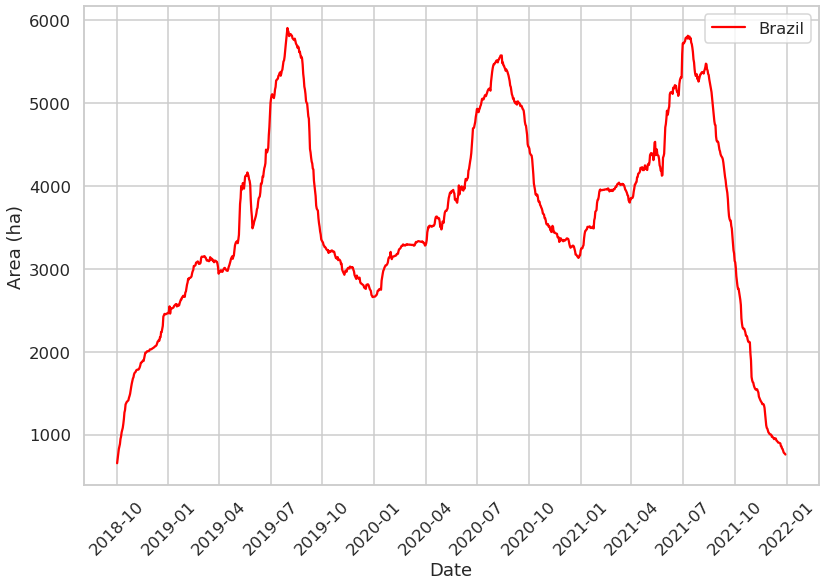

In [81]:
from matplotlib.dates import DateFormatter, MonthLocator

fig, ax = plt.subplots() 
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.set_context("talk")
sns.set_style("whitegrid")
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
g = sns.lineplot(x='Date', y='Area (ha)', data=df_speed_br_19_21, label='Brazil', marker='', linestyle='-', color='red')

In [26]:
df_speed_br[df_speed_br['Date'].dt.year == 2020].sort_values('Area (ha)',ascending=False).iloc[0:5]

,Area (ha),day,Date
day,,,
224,5574.955952,224,2020-08-12
226,5574.653230,226,2020-08-14
225,5572.341631,225,2020-08-13
223,5555.002609,223,2020-08-11
222,5545.807292,222,2020-08-10


### Biome

In [82]:
df_speed = {}
for biome in validated['Biome'].unique():
    if(str(biome) != 'nan'):
        print(f"Calculating daily deforestation for {biome}")
        df_speed_bi = deforestation_speed(validated[validated['Biome'] == biome])
        df_speed[biome] = df_speed_bi[(df_speed_bi['Date']>datetime.datetime(2018,10,1)) & (df_speed_bi['Date']<datetime.datetime(2021,12,31))]

Calculating daily deforestation for Amazônia
Calculating daily deforestation for Cerrado
Calculating daily deforestation for Caatinga
Calculating daily deforestation for Mata Atlântica
Calculating daily deforestation for Pampa
Calculating daily deforestation for Pantanal


<AxesSubplot:xlabel='Date', ylabel='Area (ha)'>

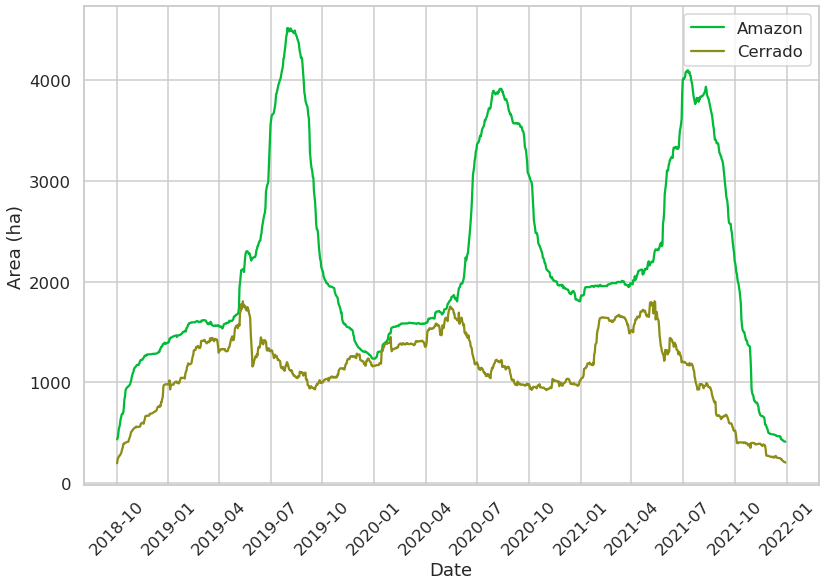

In [83]:
fig, ax = plt.subplots() 

sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.set_context("talk")
sns.set_style("whitegrid")
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Amazônia'], label='Amazon', marker='', linestyle='-', color='#00ba38')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Cerrado'], label='Cerrado', marker='', linestyle='-', color='#8c8d16')

<AxesSubplot:xlabel='Date', ylabel='Area (ha)'>

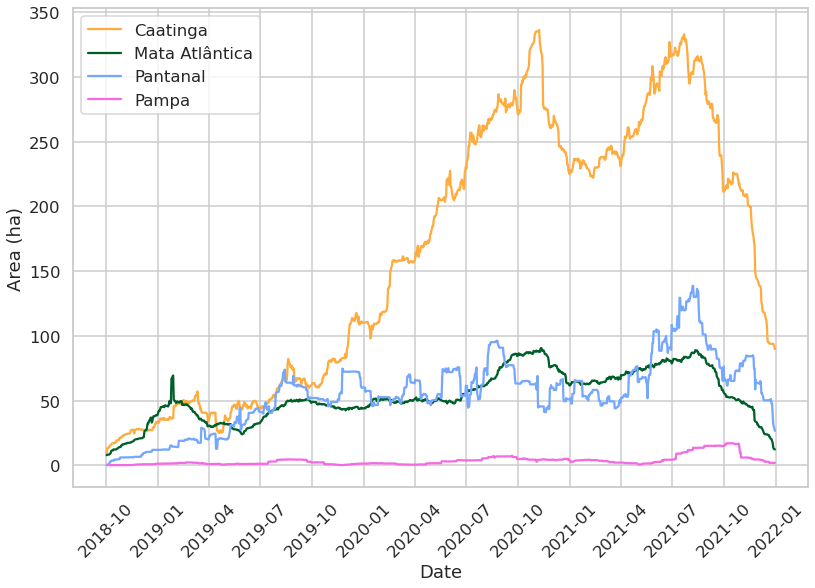

In [86]:
fig, ax = plt.subplots() 
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.set_context("talk")
sns.set_style("whitegrid")
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Caatinga'], label='Caatinga', marker='', linestyle='-', color='#ffac3e')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Mata Atlântica'], label='Mata Atlântica', marker='', linestyle='-', color='#005f28')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Pantanal'], label='Pantanal', marker='', linestyle='-', color='#74a7fd')
sns.lineplot(x='Date', y='Area (ha)', data=df_speed['Pampa'], label='Pampa', marker='', linestyle='-', color='#f569e3')

In [85]:
for key in df_speed.keys():
    dates = list(df_speed[key].sort_values('Area (ha)',ascending=False)[0:2]['Date'])
    print(f'{key}: {dates}')

Amazônia: [Timestamp('2019-07-31 00:00:00'), Timestamp('2019-08-06 00:00:00')]
Cerrado: [Timestamp('2021-05-12 00:00:00'), Timestamp('2019-05-13 00:00:00')]
Caatinga: [Timestamp('2020-11-07 00:00:00'), Timestamp('2020-11-06 00:00:00')]
Mata Atlântica: [Timestamp('2020-11-11 00:00:00'), Timestamp('2020-11-10 00:00:00')]
Pampa: [Timestamp('2021-10-09 00:00:00'), Timestamp('2021-10-06 00:00:00')]
Pantanal: [Timestamp('2021-08-06 00:00:00'), Timestamp('2021-08-07 00:00:00')]
